In [27]:
import sys
print(sys.version) # 3.12
import numpy as np # !pip3 install numpy
import pandas as pd # !pip3 install pandas
import matplotlib.pyplot as plt # !pip3 install matplotlib
import seaborn as sns # !ip install seaborn
sns.set_theme()
import yfinance as yf # !pip3 install yfinance

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [51]:
def retrieve_hist_assets(assets: list, window_range="2y") -> list:
    """Retrieve asset history values.

    Ecrire une fonction qui prend en entrée une liste de 5 actifs et qui renvoie les prix journaliers sur
    une fenêtre de 2 à 3 ans (le choix est donné à l’utilisateur) à partir de Yahoo Finance.

    N.B.:
        - package link: https://pypi.org/project/yfinance/
    :param assets: list of assets (max 5)
    :return: asset historical list
    """
    if len(assets) > 5:
        raise ValueError("On ne peut pas avoir plus de 5 assets!")
    if not window_range in ["2y", "3y"]:
        raise ValueError("Tu peux seulement demander 2y -> historique 2 ans ou 3y -> ...")
    df = pd.DataFrame()
    for asset in assets:
        msft = yf.Ticker(asset)
        hist = msft.history(period=window_range)
        hist_df = pd.DataFrame(hist)
        hist_df["actif"] = asset
        hist_df = hist_df.reset_index()
        if df.empty:
            df = hist_df.copy()
        else:
            df = pd.concat([df, hist_df])
    df["jour"] = df.Date.dt.strftime('%Y-%m-%d')
    df["mois"] = df.Date.dt.strftime('%Y-%m')
    df["annee"] = df.Date.dt.strftime('%Y')
    df = df.drop(columns=["Dividends", "Stock Splits"])
    return df.reset_index()

df = retrieve_hist_assets(assets=["AAPL", "MSFT", "AMZN", "GOOG", "TSLA"], window_range="2y")
df.sample(30)

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee
2403,391,2023-07-26 00:00:00-04:00,263.250000,268.040009,261.750000,264.350006,95856200,TSLA,2023-07-26,2023-07,2023
482,482,2023-12-04 00:00:00-05:00,189.979996,190.050003,187.449997,189.429993,43389500,AAPL,2023-12-04,2023-12,2023
870,367,2023-06-21 00:00:00-04:00,334.979411,336.333804,330.697200,332.181030,25117800,MSFT,2023-06-21,2023-06,2023
421,421,2023-09-07 00:00:00-04:00,174.949512,177.975539,173.311670,177.326385,112488800,AAPL,2023-09-07,2023-09,2023
263,263,2023-01-20 00:00:00-05:00,134.528053,137.252828,133.473947,137.103653,80223600,AAPL,2023-01-20,2023-01,2023
393,393,2023-07-28 00:00:00-04:00,194.151694,196.106482,193.623106,195.308609,48291400,AAPL,2023-07-28,2023-07,2023
1201,195,2022-10-12 00:00:00-04:00,112.489998,113.830002,111.400002,112.900002,45728700,AMZN,2022-10-12,2022-10,2022
2075,63,2022-04-04 00:00:00-04:00,363.126678,383.303345,357.510010,381.816681,82035900,TSLA,2022-04-04,2022-04,2022
1199,193,2022-10-10 00:00:00-04:00,115.099998,116.250000,112.430000,113.669998,42339700,AMZN,2022-10-10,2022-10,2022
2421,409,2023-08-21 00:00:00-04:00,221.550003,232.130005,220.580002,231.279999,135702700,TSLA,2023-08-21,2023-08,2023


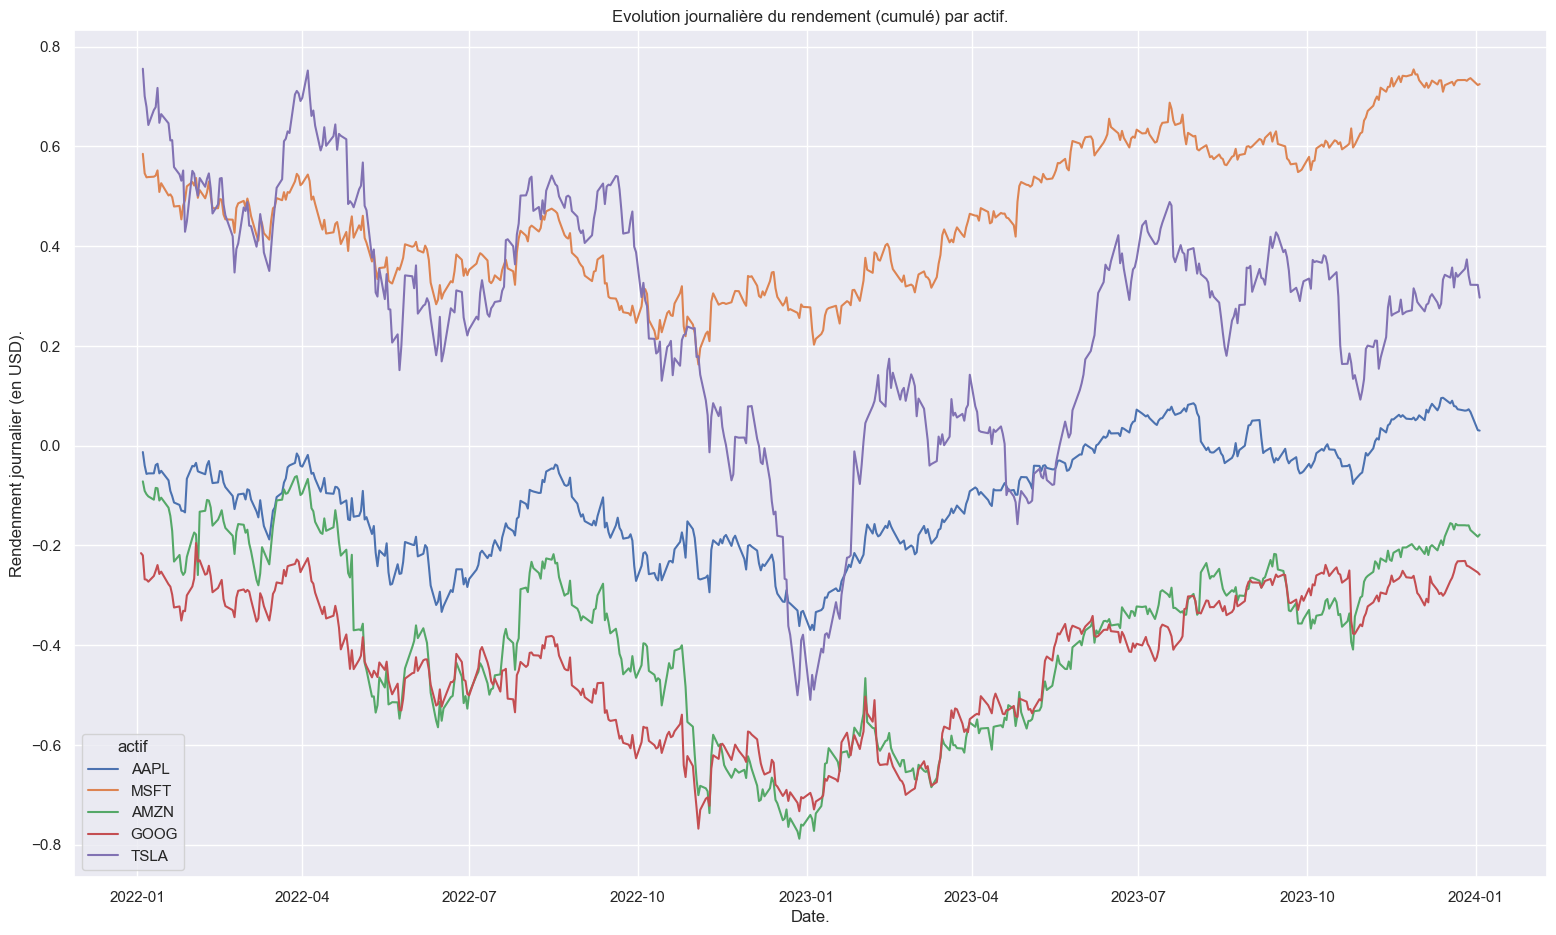

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year,Rendement_Qtot_cumul
2485,473,2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,TSLA,2023-11-20,2023-11,2023,0.005533,0.008498,0.002807,0.269435
2486,474,2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,TSLA,2023-11-21,2023-11,2023,0.023491,0.008498,0.002807,0.292926
2487,475,2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600,TSLA,2023-11-22,2023-11,2023,-0.029408,0.008498,0.002807,0.263518
2488,476,2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200,TSLA,2023-11-24,2023-11,2023,0.005280,0.008498,0.002807,0.268798
2489,477,2023-11-27 00:00:00-05:00,236.889999,238.330002,232.100006,236.080002,112031800,TSLA,2023-11-27,2023-11,2023,0.002672,0.008498,0.002807,0.271470
2490,478,2023-11-28 00:00:00-05:00,236.679993,247.000000,234.009995,246.720001,148549900,TSLA,2023-11-28,2023-11,2023,0.044083,0.008498,0.002807,0.315554
2491,479,2023-11-29 00:00:00-05:00,249.210007,252.750000,242.759995,244.139999,135401300,TSLA,2023-11-29,2023-11,2023,-0.010512,0.008498,0.002807,0.305041
2492,480,2023-11-30 00:00:00-05:00,245.139999,245.220001,236.910004,240.080002,132353200,TSLA,2023-11-30,2023-11,2023,-0.016770,0.008498,0.002807,0.288272
2493,481,2023-12-01 00:00:00-05:00,233.139999,240.190002,231.899994,238.830002,121173500,TSLA,2023-12-01,2023-12,2023,-0.005220,0.001720,0.002807,0.283051
2494,482,2023-12-04 00:00:00-05:00,235.750000,239.369995,233.289993,235.580002,104099800,TSLA,2023-12-04,2023-12,2023,-0.013701,0.001720,0.002807,0.269350


In [82]:
def get_rendement(df: pd.DataFrame) -> pd.DataFrame:
    """
    Écrire une fonction qui calcule le rendement quotidien de chaque actif. Intégrez dans cette fonction
    une variable pour calculer le rendement espéré annualisé de chaque actif. Représentez dans le
    même graphique les rendements quotidiens des 5 actifs avec des légendes claires.
    
    N.B.:
        - I used np.log -> est-ce que c'est le bon log -> validé
        - d'ailleurs shift(1) ou shift(-1) -> shift 1
        - sum cumulé sur le lineplot?
        - à refaire avec le log en maplotlib????
    """
    new_df = df.copy()
    new_df["Rendement_Qtot"] = np.log(
        new_df.Close/new_df.Close.shift(1)
    )
    rendement_moyen_mensuel_df = (
        new_df
        .groupby(["mois", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_month"}
        )
    )
    rendement_moyen_annuel_df = (
        new_df
        .groupby(["annee", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_year"}
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_mensuel_df,
            on=["actif", "mois"],
            how="left",
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_annuel_df,
            on=["actif", "annee"],
            how="left",
        )
    )
    plt.figure(figsize=(19, 11))
    plt.title("Evolution journalière du rendement (cumulé) par actif.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    new_df["Rendement_Qtot_cumul"] = new_df["Rendement_Qtot"].cumsum()
    new_show_df = ( # Juste pour faire ça joli, je filtre les outliers
        new_df[(new_df["Rendement_Qtot"] < 0.25) & (new_df["Rendement_Qtot"] > - 0.25)]
    )
    sns.lineplot(x=new_show_df["Date"], y=new_show_df["Rendement_Qtot_cumul"], hue=new_show_df["actif"])
    plt.show()
    return new_df

df_2 = get_rendement(df=df)
df_2.tail(30)

In [109]:
def get_volatility_and_export_to_csv(df: pd.DataFrame, filename="loulou.csv") -> pd.DataFrame:
    """Compute volatility and export to .csv

    Écrire une fonction pour calculer la volatilité quotidienne et mensuelle de chaque actif, stockant les
    résultats dans un fichier .csv. Définissez une autre variable pour calculer la volatilité annualisée de
    chaque actif.

    N.B.:
        - https://medium.com/@polanitzer/volatility-calculation-in-python-estimate-the-annualized-volatility-of-historical-stock-prices-db937366a54d
        - https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
        - https://pyquantnews.com/how-to-compute-volatility-6-ways/
    """
    tmp_df = df.copy()
    tmp_df["Close_squared"] = tmp_df["Close"] ** 2
    print("Calcul volatilité quotidienne.")
    df_vol_daily = (
        tmp_df
        .groupby(["actif", "jour"])
        .agg({"Close_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_daily["Daily_volatility"] = np.sqrt(df_vol_daily["Close_squared"] / df_vol_daily["index"])
    print("Calcul volatilité mensuel.")
    print("Calcul volatilité annuel.")
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_daily.drop(columns=["Close_squared"]),
            left_on=["actif", "jour"],
            right_on=["actif", "jour"],
            how="left",
        )
        .drop(columns=["index_y", "Rendement_Qtot_cumul"])
        .rename(columns={"index_x": "index"})
    )
    print(f"Creation du fichier: {filename}")
    tmp_df.drop(columns=["index", "Close_squared"]).to_csv(filename, index=False, sep=";")
    return tmp_df

df_3 = get_volatility_and_export_to_csv(df=df_2)
# df_3.sample(20)

Calcul volatilité quotidienne.
Calcul volatilité mensuel.
Calcul volatilité annuel.
Creation du fichier: loulou.csv
